Anzahl Anomalien: 7


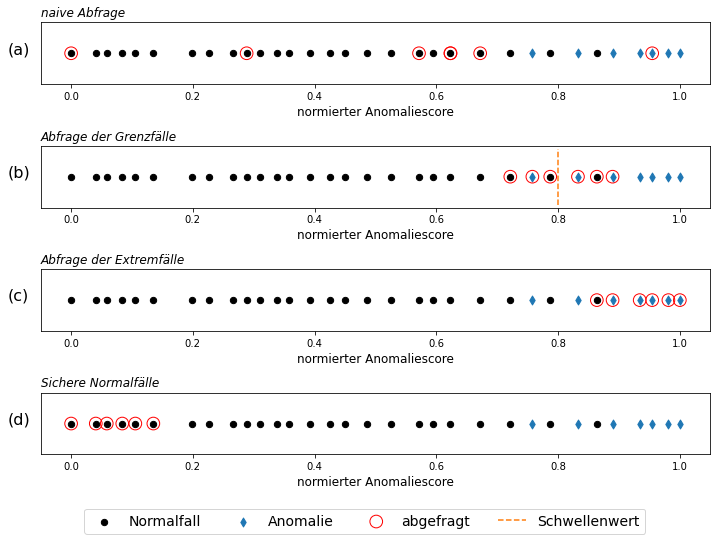

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)

num_samples = 32
budget = num_samples // 5

# Daten
data = rng.random(num_samples)

data = [0,1]
while len(data) < num_samples:
    val = rng.random(1)[0]
    arr = np.array(data)
    if np.min(np.abs(arr-val)) > 0.018:
        data.append(val)
data = np.array(data)

# Labels
label_prob = rng.random(num_samples) + 0.4
labels = label_prob * data * data > 0.6
print("Anzahl Anomalien:",np.sum(labels))

def plot_markers(ax, data, labels):
    
    normal = data[labels == 0]
    ax.scatter(normal, [1]*len(normal), marker="o", c="k", s=40, label="Normalfall")
    
    anomalous = data[labels == 1]
    ax.scatter(anomalous, [1]*len(anomalous), marker="d", c="tab:blue", s=40, label="Anomalie")
    
def plot_selection(ax, selected):
    
    ax.scatter(selected, [1]*len(selected), marker="o", s=160, facecolors='none', edgecolors='r', label="abgefragt")
    
def naive_query(data, budget=budget):
    
    idx = rng.choice(len(data), size=budget+1)
    return data[idx]
    
def margin_query(data, margin=0.8, budget=budget):
    
    diff = np.array(np.abs(data-margin))
    idx = np.argsort(diff)
    return data[idx[:budget]]
    
def extreme_case_query(data, budget=budget):
    
    extreme_cases = np.sort(np.array(data))[-budget:]
    return extreme_cases

def save_normal_query(data, budget=budget):
    
    extreme_cases = np.sort(np.array(data))[:budget]
    return extreme_cases
    
queries = [naive_query, margin_query, extreme_case_query, save_normal_query]
titles = ["naive Abfrage", "Abfrage der Grenzfälle", "Abfrage der Extremfälle", "Sichere Normalfälle"]
num_rows = 4
fig, axs = plt.subplot_mosaic([["(a)"], ["(b)"], ["(c)"], ["(d)"]], figsize=(12,1.5*num_rows))
#fig.tight_layout()
plt.subplots_adjust(left=None, bottom=1, right=None, top=2, wspace=None, hspace=1)

for i, (annotation, ax) in enumerate(axs.items()):
    plot_markers(ax, data, labels)
    plot_selection(ax, queries[i](data))
    ax.set_yticks([])
    
    if annotation == "(b)":
        ax.vlines(0.8, 0.95,1.05, linestyle="--", color="tab:orange", label="Schwellenwert")
    
    ax.set_title(titles[i], fontstyle='italic', loc="left")
    
    ax.text(-0.05, 0.5, annotation, transform=ax.transAxes, 
            size=16)
    
    ax.set_xlabel("normierter Anomaliescore", fontsize=12)

handles, q = axs["(b)"].get_legend_handles_labels()
fig.legend(handles, q, loc='lower center', bbox_to_anchor=(0.5,0.8), ncol=len(q), fontsize=14)
#fig.savefig("query_anomalyscore.pdf", bbox_inches='tight')